In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

data=pd.read_csv("robusta.txt", header=0, sep="\t")

In [3]:
data

,Month,Price,Change
0,Jul 2002,0.63,-
1,Aug 2002,0.61,-3.17%
2,Sep 2002,0.71,16.39%
3,Oct 2002,0.73,2.82%
4,Nov 2002,0.84,15.07%
...,...,...,...
230,Sep 2021,2.31,10.00%
231,Oct 2021,2.32,0.43%
232,Nov 2021,2.41,3.88%
233,Dec 2021,2.48,2.90%


In [4]:
train=data.iloc[:223]
test=data.iloc[223:]
start=len(train)
stop=len(data)-1
AR3fit=AutoReg(data['Price'],lags=3).fit()
predictionsAR3=AR3fit.predict(start=start,end=stop,dynamic=False)

C:\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


<AxesSubplot:>

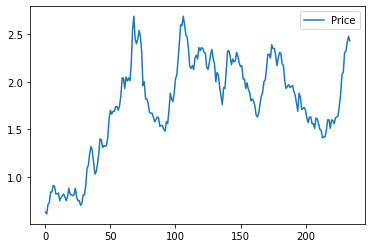

In [7]:
data['Price'].plot(legend=True,label='Price')

<AxesSubplot:>

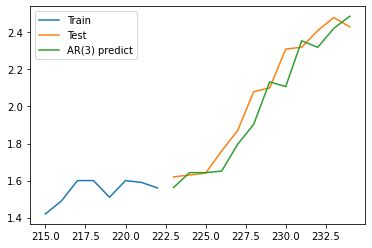

In [8]:
train['Price'].iloc[215:].plot(legend=True,label='Train')
test['Price'].plot(legend=True,label='Test')
predictionsAR3.plot(legend=True,label='AR(3) predict')

In [38]:
data['PriceDiff']=data['Price'].diff()
data['reverse_diff'] = data['Price'].shift(1) + data['PriceDiff']

In [39]:
data.iloc[0:223]['reverse_diff']

0       NaN
1      0.61
2      0.71
3      0.73
4      0.84
       ... 
218    1.60
219    1.51
220    1.60
221    1.59
222    1.56
Name: reverse_diff, Length: 223, dtype: float64

C:\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
C:\Users\TOMASZ~1\AppData\Local\Temp/ipykernel_15140/2508134981.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['reverse_diffAR'] = test['Price'].shift(1) + pd.Series(predictionsAR3diff)


<AxesSubplot:>

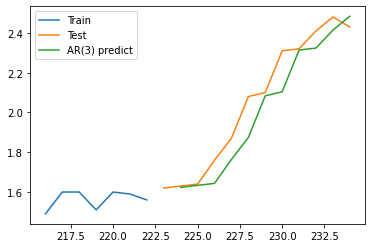

In [41]:
train=data.iloc[1:223]
test=data.iloc[223:]
start=len(train)
stop=len(data)-1
AR3fit=AutoReg(data.iloc[1:223]['PriceDiff'],lags=3).fit()

predictionsAR3diff=AR3fit.predict(start=start,end=stop,dynamic=False)
train['Price'].iloc[215:].plot(legend=True,label='Train')
test['reverse_diffAR'] = test['Price'].shift(1) + pd.Series(predictionsAR3diff)
test['reverse_diff'].plot(legend=True,label='Test')

test['reverse_diffAR'].plot(legend=True,label='AR(3) predict')

Result of using AutoReg on differenced data is very unsatisfying. Why? Becouse there is no visible correlation in differenced data, as shown below.

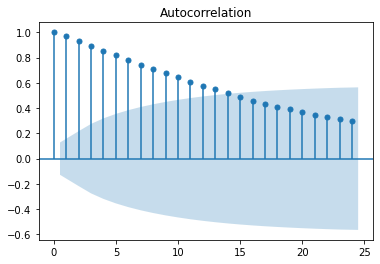

In [19]:
plot_acf(pd.Series(data['Price']));

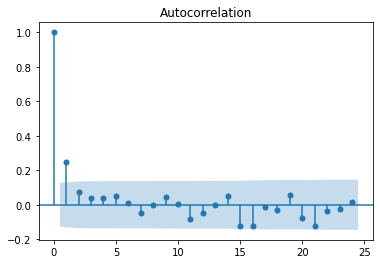

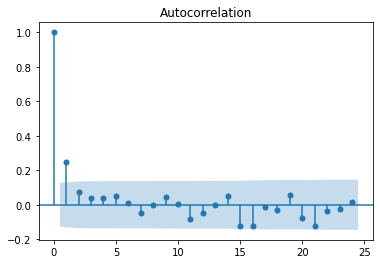

In [20]:
plot_acf(pd.Series(data['PriceDiff'].iloc[1:]))